In [2]:
import tensorflow as tf
import numpy as np
from matplotlib.pylab import plt
%matplotlib inline

In [3]:
tf.__version__

'1.13.1'

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [10]:
x_train[0].shape

(32, 32, 3)

In [6]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

170500096/170498071 [==============================] - 434s 3us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
50000/50000 [==============================] - 23s 469us/sample - loss: 1.9505 - acc: 0.2937
Epoch 2/5
50000/50000 [==============================] - 24s 474us/sample - loss: 1.8256 - acc: 0.3362
Epoch 3/5
50000/50000 [==============================] - 24s 479us/sample - loss: 1.7869 - acc: 0.3517
Epoch 4/5
50000/50000 [==============================] - 24s 480us/sample - loss: 1.7607 - acc: 0.3632
Epoch 5/5
10000/10000 [==============================] - 1s 115us/sample - loss: 1.6783 - acc: 0.4000


[1.6782746318817139, 0.4]

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(80,3,activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(160,3,activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
50000/50000 [==============================] - 141s 3ms/sample - loss: 1.4004 - acc: 0.5005
Epoch 2/5
50000/50000 [==============================] - 147s 3ms/sample - loss: 1.0476 - acc: 0.6371
Epoch 3/5
50000/50000 [==============================] - 155s 3ms/sample - loss: 0.9058 - acc: 0.6880
Epoch 4/5
50000/50000 [==============================] - 148s 3ms/sample - loss: 0.8078 - acc: 0.7217
Epoch 5/5
10000/10000 [==============================] - 9s 877us/sample - loss: 0.9731 - acc: 0.6744


[0.9731453833580017, 0.6744]

In [10]:
tmp = np.array([1,2,1,1,1])

In [11]:
np.convolve(tmp,[1,2],mode='valid')

array([4, 5, 3, 3])

In [12]:
for i in range(0, tmp.shape[0]-1):
    print('Исходное значение -',tmp[i:i+2],'Результат свертки - ',np.dot(tmp[i:i+2],[2,1]))

Исходное значение - [1 2] Результат свертки -  4
Исходное значение - [2 1] Результат свертки -  5
Исходное значение - [1 1] Результат свертки -  3
Исходное значение - [1 1] Результат свертки -  3


In [14]:
np.convolve(tmp,[1,2],mode='same')

array([1, 4, 5, 3, 3])

In [15]:
tmp = np.array([1,2,1,1,1])
tmp2 = np.append(np.array([0]),tmp)
for i in range(0,tmp2.shape[0]-1):
    print('Исходное значение -',tmp2[i:i+2],'Результат шага свертки - ',np.dot(tmp2[i:i+2],[2,1]))
# 

Исходное значение - [0 1] Результат шага свертки -  1
Исходное значение - [1 2] Результат шага свертки -  4
Исходное значение - [2 1] Результат шага свертки -  5
Исходное значение - [1 1] Результат шага свертки -  3
Исходное значение - [1 1] Результат шага свертки -  3


In [16]:
np.convolve(tmp,[1,2],mode='full')

array([1, 4, 5, 3, 3, 2])

In [17]:
tmp = np.array([1,2,1,1,1])
tmp2 = np.append(np.array([0]),tmp)
tmp2 = np.append(tmp2,np.array([0]))
for i in range(0,tmp2.shape[0]-1):
    print('Исходное значение -',tmp2[i:i+2],'Результат шага свертки - ',np.dot(tmp2[i:i+2],[2,1]))

Исходное значение - [0 1] Результат шага свертки -  1
Исходное значение - [1 2] Результат шага свертки -  4
Исходное значение - [2 1] Результат шага свертки -  5
Исходное значение - [1 1] Результат шага свертки -  3
Исходное значение - [1 1] Результат шага свертки -  3
Исходное значение - [1 0] Результат шага свертки -  2


In [ ]:
# https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html - ДЕМО

In [2]:
def show_img(img,cmap=None):
    plt.figure(figsize=(8,8))
    fig=plt.imshow(img,cmap=cmap);
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [3]:
cat = plt.imread('cat.jpg')

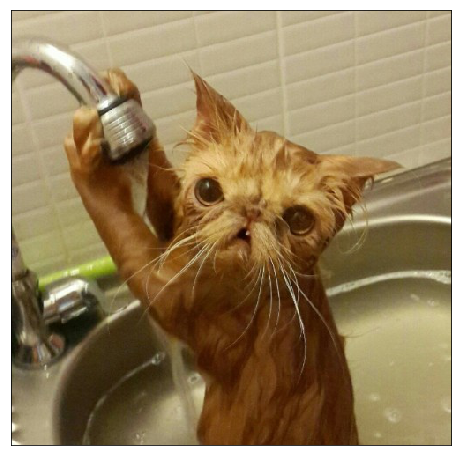

In [4]:
show_img(cat)

In [5]:
from scipy.ndimage.filters import convolve
from skimage.color import rgb2gray

ImportError: cannot import name '_validate_lengths'

In [260]:
gray_cat = np.uint8(rgb2gray(cat)*255)

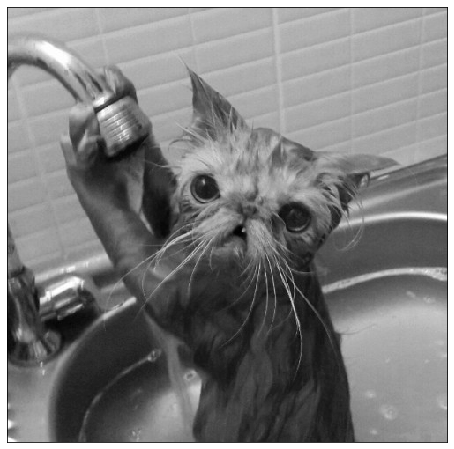

In [280]:
show_img(gray_cat,cmap='gray')

In [289]:
k = np.array([[-1,-1,-1],
              [-1,8,-1],
              [-1,-1,-1]])

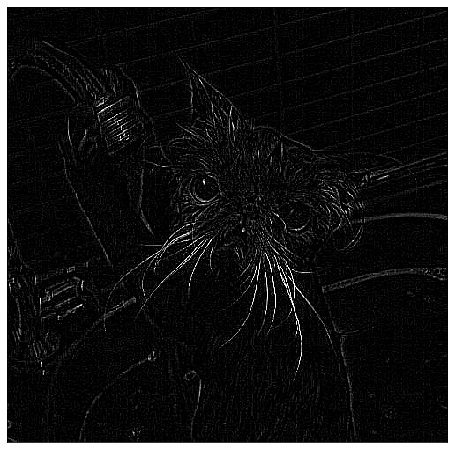

In [290]:
show_img(np.clip(convolve(gray_cat.astype(np.float32),k),0,255),cmap='gray')